In [1]:
!pip install sklearn

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.models import load_model


from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.linear_model import LogisticRegression


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.preprocessing import sequence

import time
import html
from nltk.tokenize import WordPunctTokenizer
import re

np.random.seed(0)

%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the re

from keras.preprocessing import sequence
Keras has provide very nice text processing functions.

Then we can format our text samples and labels into tensors that can be fed into a neural network. To do this, we will rely on Keras utilities keras.preprocessing.text.Tokenizer and keras.preprocessing.sequence.pad_sequences.

In [3]:
# Getting all clean data
clean_data = pd.read_csv("clean_sentences.csv")

In [4]:
# Converting it to a dataframe
df = pd.DataFrame(clean_data)

In [5]:
# looking into the shape of the data
df.shape

(1600000, 2)

In [6]:
# looking into the columns of the dataframe
df.columns

Index(['Sentences', 'Label'], dtype='object')

In [7]:
# checking if there is any null values
np.sum(df.isnull().any(axis=1))

3373

In [8]:
# looking into the rows that have null values
df[df.isnull().any(axis=1)].head()

,Sentences,Label
208,NaN,0
249,NaN,0
398,NaN,0
430,NaN,0
1011,NaN,0


In [9]:
# Dropping the nul values
df = df.dropna()

In [10]:
# Looking into the shape of the dataframe after dropping the values
df.shape

(1596627, 2)

In [11]:
# Now rechecking if there is anymore null values
np.sum(df.isnull().any(axis=1))

0

In [12]:
# Checking if we have equal no of positive and negative sentences
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [13]:
df.head()

,Sentences,Label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [14]:
df["Sentences"][1]

'is upset that he can not update his facebook by texting it and might cry as result school today also blah'

In [15]:
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [17]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(1596627,)
(1596627,)


In [18]:
print("no. of classes :")
print(np.unique(y))

no. of classes :
[0 1]


In [19]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
1519745


Sentence length: 
Mean 60.23 words (32.842545)


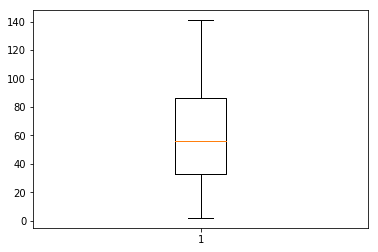

In [20]:
# Summarize sentence length
print("Sentence length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [21]:
# Just dropping null values in case if we have any
df = df.dropna()

In [22]:
# Assigning features and target valyes to X and y
x = df["Sentences"]
y = df["Label"]

In [23]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=42)

In [90]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1564694 entries with 50.01% negative, 49.99% positive
Validation set has total 15966 entries with 50.30% negative, 49.70% positive
Test set has total 15967 entries with 49.92% negative, 50.08% positive


In [ ]:
# Checking the shapes after the data split

In [24]:
x_train.shape

(1564694,)

In [25]:
X.shape[0] - x_train.shape[0]

31933

In [26]:
x_validation_and_test.shape

(31933,)

In [27]:
x_validation.shape

(15966,)

In [28]:
x_test.shape

(15967,)

## max_features=100000,ngram_range=(1, 3)

In [63]:
tvec1 = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
tvec1.fit(x_train)
x_train_tfidf = tvec1.transform(x_train)
x_validation_tfidf = tvec1.transform(x_validation).toarray()

clf = LogisticRegression()
clf.fit(x_train_tfidf, y_train)

print("clf.score for x_train_tfidf : ", clf.score(x_train_tfidf, y_train))
print("clf.score for x_validation_tfidf : ", clf.score(x_validation_tfidf, y_validation))

clf.score for x_train_tfidf :  0.8419857173351467
clf.score for x_validation_tfidf :  0.8207440811724915


## max_features=100000,ngram_range=(1, 2)

In [66]:
tvec2 = TfidfVectorizer(max_features=100000,ngram_range=(1, 2))
tvec2.fit(x_train)
x_train_tfidf = tvec2.transform(x_train)
x_validation_tfidf = tvec2.transform(x_validation).toarray()

clf1 = LogisticRegression()
clf1.fit(x_train_tfidf, y_train)

print("clf1.score for x_train_tfidf : ", clf1.score(x_train_tfidf, y_train))
print("clf1.score for x_validation_tfidf : ", clf1.score(x_validation_tfidf, y_validation))

clf1.score for x_train_tfidf :  0.840970183307407
clf1.score for x_validation_tfidf :  0.8174871602154579


## max_features=100000,ngram_range=(1, 4)

In [69]:
tvec3 = TfidfVectorizer(max_features=100000,ngram_range=(1, 4))
tvec3.fit(x_train)
x_train_tfidf = tvec3.transform(x_train)
x_validation_tfidf = tvec3.transform(x_validation).toarray()

clf2 = LogisticRegression()
clf2.fit(x_train_tfidf, y_train)

print("clf2.score for x_train_tfidf : ", clf2.score(x_train_tfidf, y_train))
print("clf2.score for x_validation_tfidf : ", clf2.score(x_validation_tfidf, y_validation))

clf2.score for x_train_tfidf :  0.8416348500090114
clf2.score for x_validation_tfidf :  0.818489289740699


## Reducing max_features 10 times and checking n_grams

## max_features=10000,ngram_range=(1, 2)

In [75]:
tvec4 = TfidfVectorizer(max_features=10000,ngram_range=(1, 2))
tvec4.fit(x_train)
x_train_tfidf = tvec4.transform(x_train)
x_validation_tfidf = tvec4.transform(x_validation).toarray()

clf4 = LogisticRegression()
clf4.fit(x_train_tfidf, y_train)

print("clf2.score for x_train_tfidf : ", clf4.score(x_train_tfidf, y_train))
print("clf2.score for x_validation_tfidf : ", clf4.score(x_validation_tfidf, y_validation))

clf2.score for x_train_tfidf :  0.8114008234197869
clf2.score for x_validation_tfidf :  0.8016409870975824


## max_features=10000,ngram_range=(1, 3)

In [77]:
tvec5 = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
tvec5.fit(x_train)
x_train_tfidf = tvec5.transform(x_train)
x_validation_tfidf = tvec5.transform(x_validation).toarray()

clf5 = LogisticRegression()
clf5.fit(x_train_tfidf, y_train)

print("clf2.score for x_train_tfidf : ", clf5.score(x_train_tfidf, y_train))
print("clf2.score for x_validation_tfidf : ", clf5.score(x_validation_tfidf, y_validation))

clf2.score for x_train_tfidf :  0.8106121708142295
clf2.score for x_validation_tfidf :  0.8012651885256169


## max_features=10000,ngram_range=(1, 4)

In [79]:
tvec6 = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
tvec6.fit(x_train)
x_train_tfidf = tvec6.transform(x_train)
x_validation_tfidf = tvec6.transform(x_validation).toarray()

clf6 = LogisticRegression()
clf6.fit(x_train_tfidf, y_train)

print("clf2.score for x_train_tfidf : ", clf6.score(x_train_tfidf, y_train))
print("clf2.score for x_validation_tfidf : ", clf6.score(x_validation_tfidf, y_validation))

clf2.score for x_train_tfidf :  0.8106121708142295
clf2.score for x_validation_tfidf :  0.8012651885256169
